TASK目标：此次TASK，请大家从RNN和LSTM两者中任选一个模型，构建属于你自己的机器作诗模型，并以“我最可爱”为第一个字做一首藏头诗。此次任务的目标是让大家进一步了解RNN或LSTM模型的大家过程。

具体要求：

（1）所有代码详细注释；

（2）如果（不是必须）涉及深度学习模型，需要清点模型参数个数；

（3）输出以“我最可爱”为首字构建的藏头诗

<center> <h1> 如何用机器“作诗”？ </h1> </center>  

# 数据读入与展示 

In [3]:
# 使用pandas读入数据
import pandas as pd
poems_text = pd.read_table('F:/大三（上）/深度学习/TASK6.2：NLP实例：机器作诗/poems_clean.txt', header=None)
poems_text.columns = ["text"]
# 查看文本
poems_text.head()

,text
0,首春:寒随穷律变 春逐鸟声开 初风飘带柳 晚雪间花梅 碧林青旧竹 绿沼翠新苔 芝田初雁去 绮...
1,初晴落景:晚霞聊自怡 初晴弥可喜 日晃百花色 风动千林翠 池鱼跃不同 园鸟声还异 寄言博通者...
2,度秋:夏律昨留灰 秋箭今移晷 峨嵋岫初出 洞庭波渐起 桂白发幽岩 菊黄开灞涘 运流方可叹 含...
3,仪鸾殿早秋:寒惊蓟门叶 秋发小山枝 松阴背日转 竹影避风移 提壶菊花岸 高兴芙蓉池 欲知凉气...
4,山阁晚秋:山亭秋色满 岩牖凉风度 疏兰尚染烟 残菊犹承露 古石衣新苔 新巢封古树 历览情无极...


# 数据预处理

> 去掉诗的题目以及空格

> 为了预测第一个字，将每首诗前面补充bbb


In [4]:
import string     # 处理字符串
import numpy as np

poems_new = []    # 初始化一个列表
for line in poems_text['text']:    # poems_text[0]的第0列，指
    title, poem = line.split(':')   # 切割
    poem = poem.replace(' ', '')   # 将空格去掉
    poem = 'bbb' + poem     # 形成新字符串
    poems_new.append(list(poem))   # 附加到列表

# 数据整理：生成X和Y

> 将一首诗中的每个字分别看成Y，将Y前面的三个字看成X1,X2,X3

In [5]:
XY  =[]    # 初始化矩阵
for poem in poems_new:
    for i in range(len(poem) - 3):  # 循环读取
        x1 = poem[i]
        x2 = poem[i+1]
        x3 = poem[i+2]
        
        y = poem[i+3]
        XY.append([x1, x2, x3, y])  # 附加到空矩阵

# 展示整理后的X和Y的形式

print("原始诗句：")
print(poems_text['text'][3864])
print("\n")
print("训练数据：")
print(["X1", "X2", "X3", "Y"])
for i in range(132763, 132773):
    print(XY[i])

原始诗句：
静夜思:床前明月光 疑是地上霜 举头望明月 低头思故乡  


训练数据：
['X1', 'X2', 'X3', 'Y']
['b', 'b', 'b', '床']
['b', 'b', '床', '前']
['b', '床', '前', '明']
['床', '前', '明', '月']
['前', '明', '月', '光']
['明', '月', '光', '疑']
['月', '光', '疑', '是']
['光', '疑', '是', '地']
['疑', '是', '地', '上']
['是', '地', '上', '霜']


# 数据整理：文字编码
> 由于文字是非结构化数据，不能在计算机中直接分析，因此对文字进行编码处理

In [7]:
from keras.preprocessing.text import Tokenizer
# 导入函数
tokenizer = Tokenizer()   # 初始化
tokenizer.fit_on_texts(poems_new) # 函数对应
print(tokenizer.word_index)   # 打印

#tokenizer默认把0这个索引留个停止词了，其它的词是从1开始索引的。
#然后分类的损失又默认0是第一类
#所以导致假设我们有三个字：a，b，c。
#他们的索引分别是1，2，3，没有0。
#这对keras要使用一个4分类才行
vocab_size = len(tokenizer.word_index) + 1
# 计算字典规格

{'b': 1, '不': 2, '人': 3, '山': 4, '风': 5, '日': 6, '无': 7, '一': 8, '云': 9, '春': 10, '花': 11, '来': 12, '何': 13, '月': 14, '水': 15, '上': 16, '有': 17, '时': 18, '中': 19, '秋': 20, '天': 21, '归': 22, '年': 23, '相': 24, '夜': 25, '知': 26, '江': 27, '君': 28, '去': 29, '长': 30, '心': 31, '见': 32, '此': 33, '白': 34, '行': 35, '自': 36, '生': 37, '客': 38, '处': 39, '为': 40, '里': 41, '空': 42, '寒': 43, '在': 44, '是': 45, '雨': 46, '下': 47, '清': 48, '如': 49, '得': 50, '落': 51, '多': 52, '高': 53, '明': 54, '远': 55, '路': 56, '门': 57, '未': 58, '声': 59, '青': 60, '家': 61, '别': 62, '南': 63, '树': 64, '尽': 65, '城': 66, '今': 67, '事': 68, '应': 69, '草': 70, '还': 71, '入': 72, '前': 73, '深': 74, '千': 75, '思': 76, '流': 77, '新': 78, '向': 79, '独': 80, '出': 81, '闲': 82, '雪': 83, '色': 84, '开': 85, '看': 86, '三': 87, '道': 88, '飞': 89, '烟': 90, '更': 91, '西': 92, '回': 93, '愁': 94, '酒': 95, '谁': 96, '万': 97, '朝': 98, '东': 99, '欲': 100, '子': 101, '玉': 102, '闻': 103, '与': 104, '满': 105, '林': 106, '望': 107, '到': 108, '马': 109, '已': 110, '重': 11

In [8]:
XY_digit = np.array(tokenizer.texts_to_sequences(XY))   # 整理矩阵
X_digit = XY_digit[:, :3]    # 定义英文元素
Y_digit = XY_digit[:, 3]     # 定义非负正整数元素

for i in range(132763, 132773):
    print("{:<35}".format(str(XY[i])), "\t", "{:<30}".format(str(list(X_digit[i]))),"\t", Y_digit[i])  
# 循环打印

['b', 'b', 'b', '床']                	 [1, 1, 1]                      	 533
['b', 'b', '床', '前']                	 [1, 1, 533]                    	 73
['b', '床', '前', '明']                	 [1, 533, 73]                   	 54
['床', '前', '明', '月']                	 [533, 73, 54]                  	 14
['前', '明', '月', '光']                	 [73, 54, 14]                   	 141
['明', '月', '光', '疑']                	 [54, 14, 141]                  	 430
['月', '光', '疑', '是']                	 [14, 141, 430]                 	 45
['光', '疑', '是', '地']                	 [141, 430, 45]                 	 114
['疑', '是', '地', '上']                	 [430, 45, 114]                 	 16
['是', '地', '上', '霜']                	 [45, 114, 16]                  	 203


# 建模：Embedding + 逻辑回归


In [9]:
# Embedding + 线性模型
from keras.layers import Input, Embedding   # 导入库
from keras.models import Sequential, load_model, Model
from keras.layers import Input, Dense, Activation, Embedding, Flatten
hidden_size = 256     # 建立虚拟空间

inp = Input(shape=(3,))   # 定义长度为3的向量
x = Embedding(vocab_size, hidden_size)(inp)  # 嵌入虚拟空间中去
x = Flatten()(x)   # 拉直成向量
x = Dense(vocab_size)(x)    # 全连接输出
pred = Activation('softmax')(x)  # 定义多分类预测

model = Model(inp, pred)    # 模型整合
model.summary()          # 模型结构

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
embedding (Embedding)        (None, 3, 256)            1420032   
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 5547)              4265643   
_________________________________________________________________
activation (Activation)      (None, 5547)              0         
Total params: 5,685,675
Trainable params: 5,685,675
Non-trainable params: 0
_________________________________________________________________


In [10]:
print(vocab_size)    # 字符类别
print(hidden_size)   # 虚拟空间的维度为256

5547
256


参数：

输入层：定义一个3通道的向量，不消耗任何参数

虚拟空间层：消耗5547x256=1420032个参数

flatten 层：将3个长度为256的向量变为1个长度为768的向量，不消耗任何参数

dense 层：768不同字符输出到5547个向量的节点上，消耗的参数是768+1=769,769x5547=4265643个参数

总计：消耗5,685,675的参数
_______________________________________________________________

# 建模：训练模型

In [11]:
from sklearn.model_selection import train_test_split  # 导入拆分数据集函数
X_train, X_test, Y_train, Y_test = train_test_split(X_digit,Y_digit,test_size=0.2, random_state=0)
# 拆分数据集
from keras.optimizers import Adam      # 导⼊优化器Adam
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001)) 
# 模型编译，损失函数为交叉熵；优化器为Adam；学习速率为0.001 ；衡量指标为精度
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=10000, epochs=10)
# 训练10轮；模型训练，⽤训练集

Epoch 1/10
65/65 [==============================] - 291s 4s/step - loss: 8.1097 - val_loss: 7.0660
Epoch 2/10
65/65 [==============================] - 305s 5s/step - loss: 6.9686 - val_loss: 6.9317
Epoch 3/10
65/65 [==============================] - 309s 5s/step - loss: 6.8377 - val_loss: 6.7867
Epoch 4/10
65/65 [==============================] - 311s 5s/step - loss: 6.6422 - val_loss: 6.6031
Epoch 5/10
65/65 [==============================] - 290s 4s/step - loss: 6.4269 - val_loss: 6.4415
Epoch 6/10
65/65 [==============================] - 263s 4s/step - loss: 6.2320 - val_loss: 6.3175
Epoch 7/10
65/65 [==============================] - 258s 4s/step - loss: 6.0617 - val_loss: 6.2236
Epoch 8/10
65/65 [==============================] - 268s 4s/step - loss: 5.9098 - val_loss: 6.1527
Epoch 9/10
65/65 [==============================] - 255s 4s/step - loss: 5.7714 - val_loss: 6.0991
Epoch 10/10
65/65 [==============================] - 264s 4s/step - loss: 5.6442 - val_loss: 6.0603


# 模型效果展示

In [12]:
sample_text = ['床', '前', '明']     # 长度为3的向量
print(sample_text)                    # 随机筛选
sample_index = tokenizer.texts_to_sequences(sample_text)  # 向量对应
print(sample_index)
word_prob = model.predict(np.array(sample_index).reshape(1, 3))[0]  # 模型预测
print(tokenizer.index_word[word_prob.argmax()], word_prob.max())  # 打印出最大概论元素

['床', '前', '明']
[[533], [73], [54]]
月 0.37017816


# 应用模型作诗

In [13]:
poem_incomplete = 'bbb熊****大****很****帅****'   # 生成藏头诗首字
poem_index = []  # 建立空矩阵
poem_text = ''   # 空字符串记录
for i in range(len(poem_incomplete)):
    current_word = poem_incomplete[i]  # 对每一个字符做循环
    
    if  current_word != '*':   #提取
        # 给定的词
        index = tokenizer.word_index[current_word]  #赋值
    else:
        # 根据前三个词预测 *
        x = poem_index[-3:]  # 调用元素
        y = model.predict(np.expand_dims(x, axis=0))[0]  # 预测附加
        index = y.argmax()    # 刻画变量
        current_word = tokenizer.index_word[index]   # 取出最大概率字符


    poem_index.append(index)    # 附加
    poem_text = poem_text + current_word   # 合并
        

poem_text = poem_text[3:]  # 去掉无义符
print(poem_text[0:5])      # 输出
print(poem_text[5:10])
print(poem_text[10:15])
print(poem_text[15:20])

熊家贫居士
大夫子何时
很药气生涯
帅不知君子


### 以“我最可爱”为首字构建的藏头诗

In [14]:
poem_incomplete = 'bbb我****最****可****爱****'
poem_index = []
poem_text = ''
for i in range(len(poem_incomplete)):
    current_word = poem_incomplete[i]
    
    if  current_word != '*':
        # 给定的词
        index = tokenizer.word_index[current_word]
    else:
        # 根据前三个词预测 *
        x = poem_index[-3:]
        y = model.predict(np.expand_dims(x, axis=0))[0]
        index = y.argmax()
        current_word = tokenizer.index_word[index]


    poem_index.append(index)
    poem_text = poem_text + current_word
        

poem_text = poem_text[3:]
print(poem_text[0:5])
print(poem_text[5:10])
print(poem_text[10:15])
print(poem_text[15:20])

我心无事不
最高楼望月
可怜君子不
爱此中何事


# STEP2 - RNN

## 机器作诗进阶：RNN 

In [15]:
import string    # 处理字符串
import numpy as np
# 读入文件
f = open('F:/大三（上）/深度学习/TASK6.2：NLP实例：机器作诗/poems_clean.txt', "r", encoding='utf-8')
poems = []   # 初始化列表
for line in f.readlines():   # 循环
    title, poem = line.split(':')  # 分割
    poem = poem.replace(' ', '') # 将空格去掉
    poem = poem.replace('\n', '') # 将换行符去掉
    poems.append(list(poem))    # 附加
    
print(poems[0][:])

['寒', '随', '穷', '律', '变', '春', '逐', '鸟', '声', '开', '初', '风', '飘', '带', '柳', '晚', '雪', '间', '花', '梅', '碧', '林', '青', '旧', '竹', '绿', '沼', '翠', '新', '苔', '芝', '田', '初', '雁', '去', '绮', '树', '巧', '莺', '来']


### 数据整理：文字编码

In [16]:
from keras.preprocessing.text import Tokenizer   # 导入函数
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()  # 初始化编码字典
tokenizer.fit_on_texts(poems)   # 去重
poems_digit = tokenizer.texts_to_sequences(poems)   #编码后生成列表
vocab_size = len(tokenizer.word_index) + 1 # 加上停止词0
vocab_size # 有多少个不同的字

5546

### 补全数据

In [17]:
#为了将所有的诗放在一个M*N的np.array中，将每一首诗补0到同样的长度
poems_digit = pad_sequences(poems_digit, maxlen=50, padding='post')   # 假设编码成50的向量
print("原始诗歌")
print(poems[3864])
print("\n")
print("编码+补全后的结果")
print(poems_digit[3864])

原始诗歌
['床', '前', '明', '月', '光', '疑', '是', '地', '上', '霜', '举', '头', '望', '明', '月', '低', '头', '思', '故', '乡']


编码+补全后的结果
[532  72  53  13 140 429  44 113  15 202 688 128 106  53  13 502 128  75
 134 169   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


### 生成 𝑋 和 𝑌 

In [18]:
X = poems_digit[:, :-1]    # 矩阵索引
Y = poems_digit[:, 1:]
print("X示例", "\t", "Y示例")

for i in range(10):
    print(X[0][i], "\t", Y[0][i])
    
print("...", "\t", "...")

X示例 	 Y示例
42 	 180
180 	 401
401 	 1143
1143 	 671
671 	 9
9 	 331
331 	 130
130 	 58
58 	 84
84 	 177
... 	 ...


### 把Y变成One-Hot向量

In [ ]:
from keras.utils import to_categorical    # 导入函数
Y = to_categorical(Y, num_classes=vocab_size) # 自动形成矩阵
print(Y.shape)

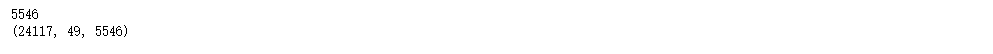

### 确定空间维度

In [20]:
from keras.models import Model   # 导入模型
from keras.layers import Input, SimpleRNN, Dense, Embedding, Activation, BatchNormalization
# 导入函数
embedding_size = 64  # 控制虚拟维度
hidden_size = 128    # 控制状态空间的维度，记录所有历史信息

### 构建RNN的模型

In [21]:
inp = Input(shape=(49,))    # 定义输入项，长度为49的向量

# Encoder
x = Embedding(vocab_size, embedding_size, mask_zero=True)(inp)  # 控制空间
x = SimpleRNN(hidden_size,return_sequences=True)(x)   # 调用模型

# prediction
x = Dense(vocab_size)(x)    # 输出层
pred = Activation('softmax')(x)   # 

model = Model(inp, pred)   # 模型整合
model.summary()            # 模型结构

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 49)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 49, 64)            354944    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 49, 128)           24704     
_________________________________________________________________
dense_1 (Dense)              (None, 49, 5546)          715434    
_________________________________________________________________
activation_1 (Activation)    (None, 49, 5546)          0         
Total params: 1,095,082
Trainable params: 1,095,082
Non-trainable params: 0
_________________________________________________________________


### 参数个数

vocab_size=5546; embedding_size=64; hidden_size=128

Embedding: 5546*64 = 354944

RNN：12864 +128128+128 = 24704

Dense： 5546*128+5546=715434

### 模型训练

In [ ]:
from keras.optimizers import Adam     
# 定义优化器，代价函数，训练过程中计算准确率
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.fit(X, Y, epochs=2, batch_size=128, validation_split=0.2)

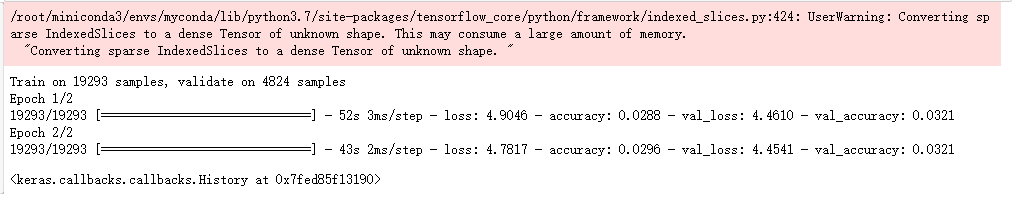

### 应用模型作诗

In [23]:
poem_incomplete = '熊****大****很****帅****'  # 生成藏头诗首字
poem_index = []   # 建立空矩阵
poem_text = ''   # 空字符串记录
for i in range(len(poem_incomplete)):
    current_word = poem_incomplete[i]    # 对每一个当前字符做循环
    
    if  current_word != '*':   #提取
        index = tokenizer.word_index[current_word]    #赋值
        
    else:
        x = np.expand_dims(poem_index, axis=0)    # 创作
        x = pad_sequences(x, maxlen=49, padding='post')   # 创作
        y = model.predict(x)[0, i]    # 模型预测
        
        y[0] = 0            #去掉停止词
        index = y.argmax()    # 概率分析
        current_word = tokenizer.index_word[index]   # 取出最大概率字符
        
        


    poem_index.append(index)   # 附加
    poem_text = poem_text + current_word   # 合并
        
poem_text = poem_text[0:]   # 去掉无义符
print(poem_text[0:5])        # 打印出来
print(poem_text[5:10])
print(poem_text[10:15])
print(poem_text[15:20])

熊搢玷捉疟
大钺妃寥莘
很猕瑶毬轻
帅锤笏吠鞯


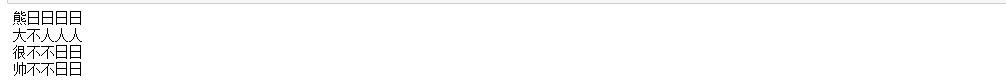

### 以“我最可爱”为首字构建的藏头诗

In [24]:
poem_incomplete = '我****最****可****爱****'
poem_index = []
poem_text = ''
for i in range(len(poem_incomplete)):
    current_word = poem_incomplete[i]
    
    if  current_word != '*':
        index = tokenizer.word_index[current_word]
        
    else:
        x = np.expand_dims(poem_index, axis=0)
        x = pad_sequences(x, maxlen=49, padding='post')
        y = model.predict(x)[0, i]
        
        y[0] = 0            #去掉停止词
        index = y.argmax()
        current_word = tokenizer.index_word[index]
        
        


    poem_index.append(index)
    poem_text = poem_text + current_word
        
poem_text = poem_text[0:]
print(poem_text[0:5])
print(poem_text[5:10])
print(poem_text[10:15])
print(poem_text[15:20])

我鈇齖孤茎
最诵豹楞千
可助递佑臧
爱轵抱将虢


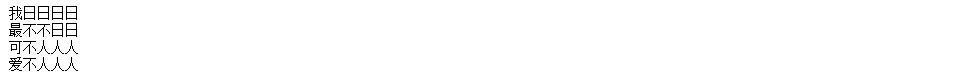

# STEP3 - LSTM

### 参数

13.0.1  Embedding层
我们一共有5546个字，每个字嵌入到一个128维的空间中，所以参数个数为： 5546×128=70988 。

13.0.2  LSTM层
第一、参考之前LSTM的介绍可以知道，需要参数估计的非线性变幻主要涉及到： 𝑓𝑡 ,  𝑖𝑡 ,  𝐶̃ 𝑡 , 还有  𝑜𝑡 。每个非线性变化所消耗的参数一样。背后主要的原因是：TF要求 ℎ𝑡 和 𝑐𝑡 的维度一样（理论上完全可以不一样）。

第二、以 𝑓𝑡 为例，它作用在 (ℎ𝑡−1,𝑥𝑡) 上面。由于 ℎ𝑡−1 和 𝑥𝑡 分别是一个64维和128维的向量。加上截距项，需要64+128+1=193个参数。这些参数应用到遗忘门，帮助 𝐶𝑡 状态更新的时候，需要消耗：193*64=12352个参数。

第三，因为， 𝑓𝑡 ,  𝑖𝑡 ,  𝐶̃ 𝑡 , 还有 𝑜𝑡 一共4个非线性变换，而每一个变换所消耗的参数都是12352，因此，最终所需的所有参数是： 12352×4=49408 。

13.0.3  dense层
这是一个5546类的分类问题，输入就是h维度+常数项，所以参数个数为： (64+1)×5546=360490 。

### 数据读入和展示

In [25]:
import string
import numpy as np

f = open('F:/大三（上）/深度学习/TASK6.2：NLP实例：机器作诗/poems_clean.txt', "r", encoding='utf-8')
poems = []
for line in f.readlines():
    title, poem = line.split(':')
    poem = poem.replace(' ', '') #将空格去掉
    poem = poem.replace('\n', '') #将换行符去掉
    poems.append(list(poem))
    
print(poems[0][:])

['寒', '随', '穷', '律', '变', '春', '逐', '鸟', '声', '开', '初', '风', '飘', '带', '柳', '晚', '雪', '间', '花', '梅', '碧', '林', '青', '旧', '竹', '绿', '沼', '翠', '新', '苔', '芝', '田', '初', '雁', '去', '绮', '树', '巧', '莺', '来']


### 数据整理：文字编码

In [26]:
from keras.preprocessing.text import Tokenizer   # 导入函数
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(poems)   # 去重
vocab_size = len(tokenizer.word_index) + 1 #加上停止词0
poems_digit = tokenizer.texts_to_sequences(poems)
#为了将所有的诗放在一个M*N的np.array中，将每一首诗补0到同样的长度
poems_digit = pad_sequences(poems_digit, maxlen=50, padding='post')    # 生成50列的矩阵

### 数据整理：生成 𝑋 和 𝑌

### 数据补全

In [27]:
print("原始诗歌")
print(poems[3864])
print("\n")
print("编码+补全后的结果")
print(poems_digit[3864])

原始诗歌
['床', '前', '明', '月', '光', '疑', '是', '地', '上', '霜', '举', '头', '望', '明', '月', '低', '头', '思', '故', '乡']


编码+补全后的结果
[532  72  53  13 140 429  44 113  15 202 688 128 106  53  13 502 128  75
 134 169   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


### 生成 𝑋 和 𝑌 

In [28]:
X = poems_digit[:, :-1]    # 去掉最后一列生成X
Y = poems_digit[:, 1:]     # 取第2列开始到最后
print("X示例", "\t", "Y示例")

for i in range(10):
    print(X[0][i], "\t", Y[0][i])
    
print("...", "\t", "...")

X示例 	 Y示例
42 	 180
180 	 401
401 	 1143
1143 	 671
671 	 9
9 	 331
331 	 130
130 	 58
58 	 84
84 	 177
... 	 ...


### 把Y变成One-Hot向量

In [ ]:
from keras.utils import to_categorical     # 导入函数
Y = to_categorical(Y, num_classes=vocab_size)    # 转化为高维向量
print(Y.shape)

### 构建LSTM的模型

In [30]:
# from keras.models import Model
from keras.layers import Input, LSTM, Dense, Embedding, Activation, BatchNormalization
from keras import Model     #导入模型

hidden_size1 = 128     # 定义隐空间的维数1
hidden_size2 = 64      # 定义隐空间的维数2

inp = Input(shape=(49,))    # 定义输入变量，长度为49的向量

# Encoder
x = Embedding(vocab_size, hidden_size1, input_length=49, mask_zero=True)(inp)   # 控制设置
x = LSTM(hidden_size2, return_sequences=True)(x)   # 建立模型

# prediction
x = Dense(vocab_size)(x)   # 输出节点的全连接层
pred = Activation('softmax')(x)   # 分类的非线性变化

model = Model(inp, pred)    # 模型整合
model.summary()         # 模型结构

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 49)]              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 49, 128)           709888    
_________________________________________________________________
lstm (LSTM)                  (None, 49, 64)            49408     
_________________________________________________________________
dense_2 (Dense)              (None, 49, 5546)          360490    
_________________________________________________________________
activation_2 (Activation)    (None, 49, 5546)          0         
Total params: 1,119,786
Trainable params: 1,119,786
Non-trainable params: 0
_________________________________________________________________


### 参数

13.0.1  Embedding层
我们一共有5546个字，每个字嵌入到一个128维的空间中，所以参数个数为： 5546×128=70988 。

13.0.2  LSTM层
第一、参考之前LSTM的介绍可以知道，需要参数估计的非线性变幻主要涉及到： 𝑓𝑡 ,  𝑖𝑡 ,  𝐶̃ 𝑡 , 还有  𝑜𝑡 。每个非线性变化所消耗的参数一样。背后主要的原因是：TF要求 ℎ𝑡 和 𝑐𝑡 的维度一样（理论上完全可以不一样）。

第二、以 𝑓𝑡 为例，它作用在 (ℎ𝑡−1,𝑥𝑡) 上面。由于 ℎ𝑡−1 和 𝑥𝑡 分别是一个64维和128维的向量。加上截距项，需要64+128+1=193个参数。这些参数应用到遗忘门，帮助 𝐶𝑡 状态更新的时候，需要消耗：193*64=12352个参数。

第三，因为， 𝑓𝑡 ,  𝑖𝑡 ,  𝐶̃ 𝑡 , 还有 𝑜𝑡 一共4个非线性变换，而每一个变换所消耗的参数都是12352，因此，最终所需的所有参数是： 12352×4=49408 。

13.0.3  dense层
这是一个5546类的分类问题，输入就是h维度+常数项，所以参数个数为： (64+1)×5546=360490 。

### 模型训练

In [ ]:
# 定义优化器，代价函数，训练过程中计算准确率
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
model.fit(X, Y, epochs=10, batch_size=128, validation_split=0.2)

### 应用模型作诗

In [32]:
poem_incomplete = '熊****大****很****帅****'   # 生成藏头诗首字
poem_index = []    # 建立空矩阵
poem_text = ''      # 空字符串记录
for i in range(len(poem_incomplete)):
    current_word = poem_incomplete[i]   # 对每一个当前字符做循环
    
    if  current_word != '*':    #提取
        index = tokenizer.word_index[current_word]     #赋值
        
    else:
        x = np.expand_dims(poem_index, axis=0)     # 创作
        x = pad_sequences(x, maxlen=49, padding='post')    # 创作
        y = model.predict(x)[0, i]      # 模型预测
        
        y[0] = 0            #去掉停止词
        index = y.argmax()    # 概率分析
        current_word = tokenizer.index_word[index]   # 取出最大概率字符

    poem_index.append(index)    # 附加
    poem_text = poem_text + current_word     # 合并
        
poem_text = poem_text[0:]   # 去掉无义符
print(poem_text[0:5])        # 打印出来
print(poem_text[5:10])
print(poem_text[10:15])
print(poem_text[15:20])

熊莛缔齁左
大衍苍漱琥
很琥漱裸鏖
帅孔孔娩何


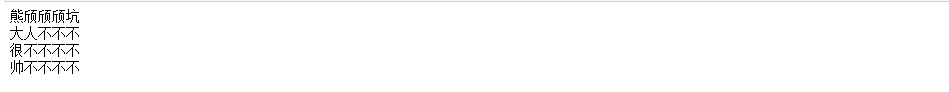